In [478]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [479]:
df = pd.read_csv("diamond.csv")

In [480]:
print("Dataset shape",df.shape)

Dataset shape (53940, 13)


In [481]:
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,5,0.31,Good,J,SI2,34178,4.70,63.3,58,335,4.34,4.35,2.75


In [482]:
df.describe()

,average us salary,number of diamonds mined (millions)
count,53940.000000,53940.000000
mean,39521.990100,2.902669
std,5486.892971,1.325985
min,30000.000000,0.600000
25%,34780.000000,1.750000
50%,39547.500000,2.910000
75%,44252.000000,4.050000
max,48999.000000,5.200000


In [483]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           53563 non-null  object 
 1   carat                                52430 non-null  object 
 2   cut                                  52647 non-null  object 
 3   color                                52428 non-null  object 
 4   clarity                              53587 non-null  object 
 5   average us salary                    53940 non-null  int64  
 6   number of diamonds mined (millions)  53940 non-null  float64
 7   depth                                53246 non-null  object 
 8   table                                52398 non-null  object 
 9   price                                52357 non-null  object 
 10  x                                    52414 non-null  object 
 11  y                           

In [484]:
print("Categorical Columns - ",df.select_dtypes(include=['object']).columns)

Categorical Columns -  Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


In [485]:
print("Numerical Columns-",df.select_dtypes(include=['int64','float64']).columns)

Numerical Columns- Index(['average us salary', 'number of diamonds mined (millions)'], dtype='object')


In [486]:
cat = len(df.select_dtypes(include=['object']).columns)
num = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features:', cat+num," = ",cat, 'categorical', '+',
      num, 'numerical')

Total Features: 13  =  11 categorical + 2 numerical


In [487]:
print("Null Values in each column")
print(df.isnull().sum())  

Null Values in each column
Unnamed: 0                              377
carat                                  1510
cut                                    1293
color                                  1512
clarity                                 353
average us salary                         0
number of diamonds mined (millions)       0
depth                                   694
table                                  1542
price                                  1583
x                                      1526
y                                      1221
z                                      1433
dtype: int64


In [488]:
df = df.drop(columns=['Unnamed: 0','average us salary'],axis=1)

In [489]:
print("Unique values in each column- \n",df.nunique())

Unique values in each column- 
 carat                                    276
cut                                       18
color                                     17
clarity                                   18
number of diamonds mined (millions)      461
depth                                    187
table                                    127
price                                  11443
x                                        556
y                                        552
z                                        378
dtype: int64


In [490]:
for i in df.select_dtypes(include=['object']).columns:
    mode_value = df[i].mode()[0]
    df[i].fillna(mode_value,inplace=True)
print(df.isnull().sum())  

carat                                  0
cut                                    0
color                                  0
clarity                                0
number of diamonds mined (millions)    0
depth                                  0
table                                  0
price                                  0
x                                      0
y                                      0
z                                      0
dtype: int64


In [491]:
print("String values in Numeric data type:")
for c in df.select_dtypes(include=['object']):
    stringValues = df[c].str.isalpha()
    print(c,"-",stringValues.sum())

String values in Numeric data type:
carat - 1357
cut - 42478
color - 53940
clarity - 3119
depth - 1380
table - 1368
price - 2096
x - 2913
y - 511
z - 975


In [492]:
for c in ["carat","depth","table","price","x","y","z"]:
    numValues = pd.to_numeric(df[c],errors="coerce")
    mean = numValues.mean()
    df[c]=df[c].apply(lambda x: mean if pd.isna(pd.to_numeric(x,errors="coerce")) else x)
    df[c] = pd.to_numeric(df[c], errors='coerce')

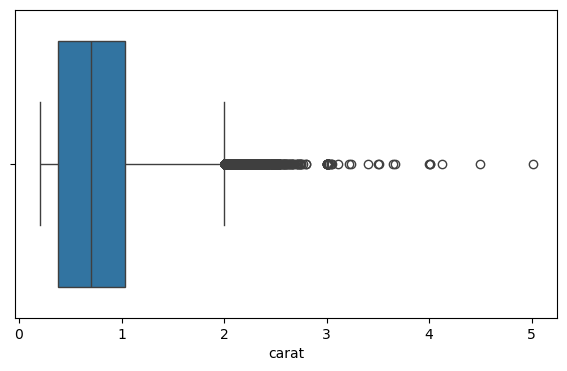

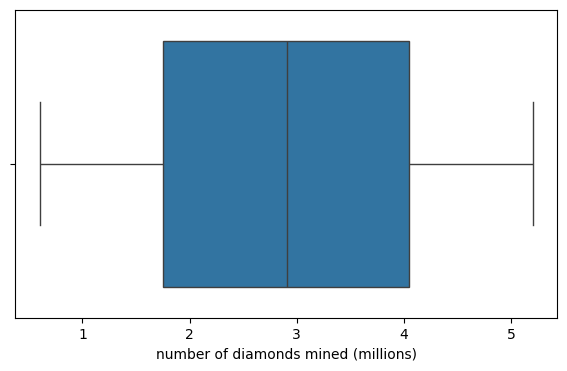

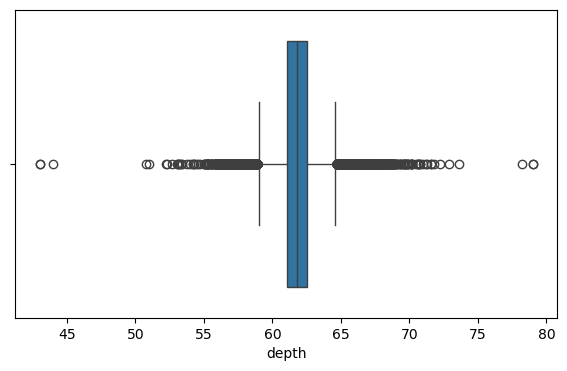

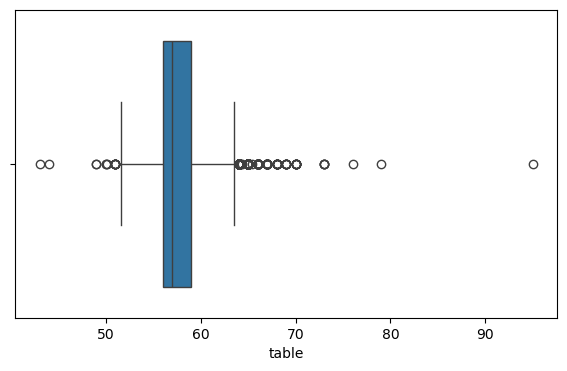

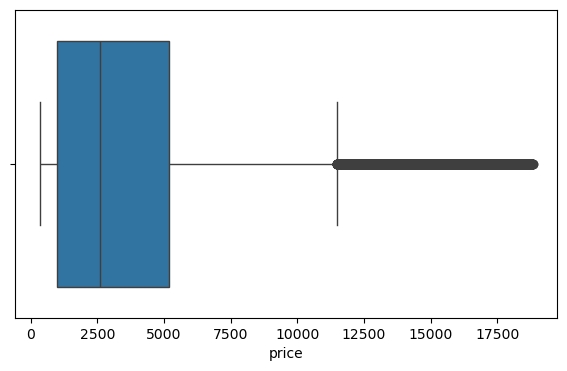

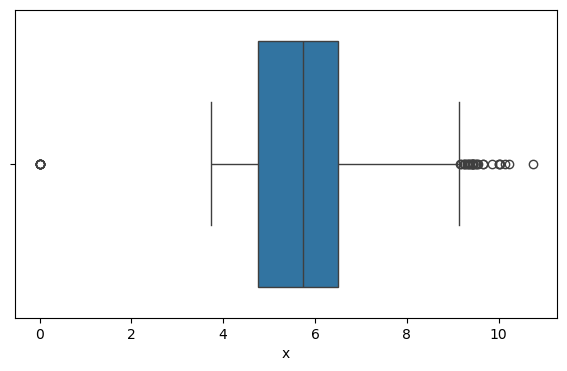

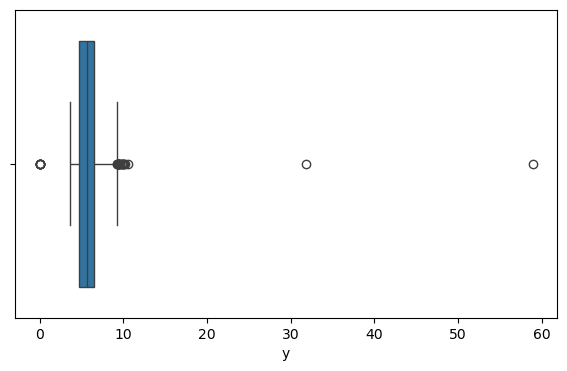

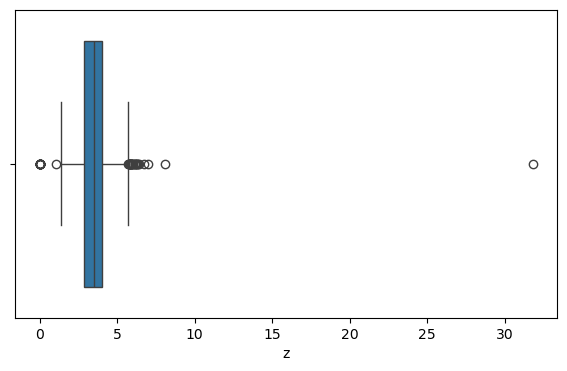

In [493]:
# plotting graph to understand the data and check for outliers
for c in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[c])  
    plt.show()

In [494]:
for c in df.select_dtypes(include=['int64','float64']).columns:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = df[(df[c] < lower_bound) | (df[c] > upper_bound)]

    print(f"{c:10} : {len(outliers):1}")
    
    # removing outliers 
    df = df[(df[c] >= lower_bound) & (df[c] <= upper_bound)]


    


carat      : 1779
number of diamonds mined (millions) : 0
depth      : 2692
table      : 324
price      : 2612
x          : 5
y          : 1
z          : 7


In [495]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 46520 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   carat                                46520 non-null  float64
 1   cut                                  46520 non-null  object 
 2   color                                46520 non-null  object 
 3   clarity                              46520 non-null  object 
 4   number of diamonds mined (millions)  46520 non-null  float64
 5   depth                                46520 non-null  float64
 6   table                                46520 non-null  float64
 7   price                                46520 non-null  float64
 8   x                                    46520 non-null  float64
 9   y                                    46520 non-null  float64
 10  z                                    46520 non-null  float64
dtypes: float64(8), object(3)
memory u

In [496]:
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.lower()
    print(c,df[c].unique())


cut ['ideal' 'premium' 'good' 'very good' 'fair' 'maybe' 'false' 'true']
color ['e' 'i' 'j' 'h' 'f' 'g' 'd' 'maybe' 'true' 'false']
clarity ['si2' 'si1' 'vs2' 'vvs2' 'vvs1' 'vs1' 'i1' 'maybe' 'false' 'if' 'true']


In [497]:
for c in df.select_dtypes(include=['object']).columns:
    print(df[c].value_counts())

cut
ideal        20188
premium      11126
very good    10171
good          3503
maybe          447
false          438
true           371
fair           276
Name: count, dtype: int64
color
g        10717
e         8229
f         7823
h         6613
d         5697
i         4112
j         2089
maybe      425
false      410
true       405
Name: count, dtype: int64
clarity
si1      11217
vs2      10344
si2       7019
vs1       7008
vvs2      4395
vvs1      3258
if        1562
i1         464
false      432
maybe      416
true       405
Name: count, dtype: int64


In [499]:
# removing maybe , false , true
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c][~df[c].isin(["maybe", "false", "true","if"])]

df = df.reset_index(drop=True)
df = df.dropna()

In [503]:
for col in df.select_dtypes(include=['object']).columns:
    df = pd.get_dummies(df, columns=[col],dtype=float) 

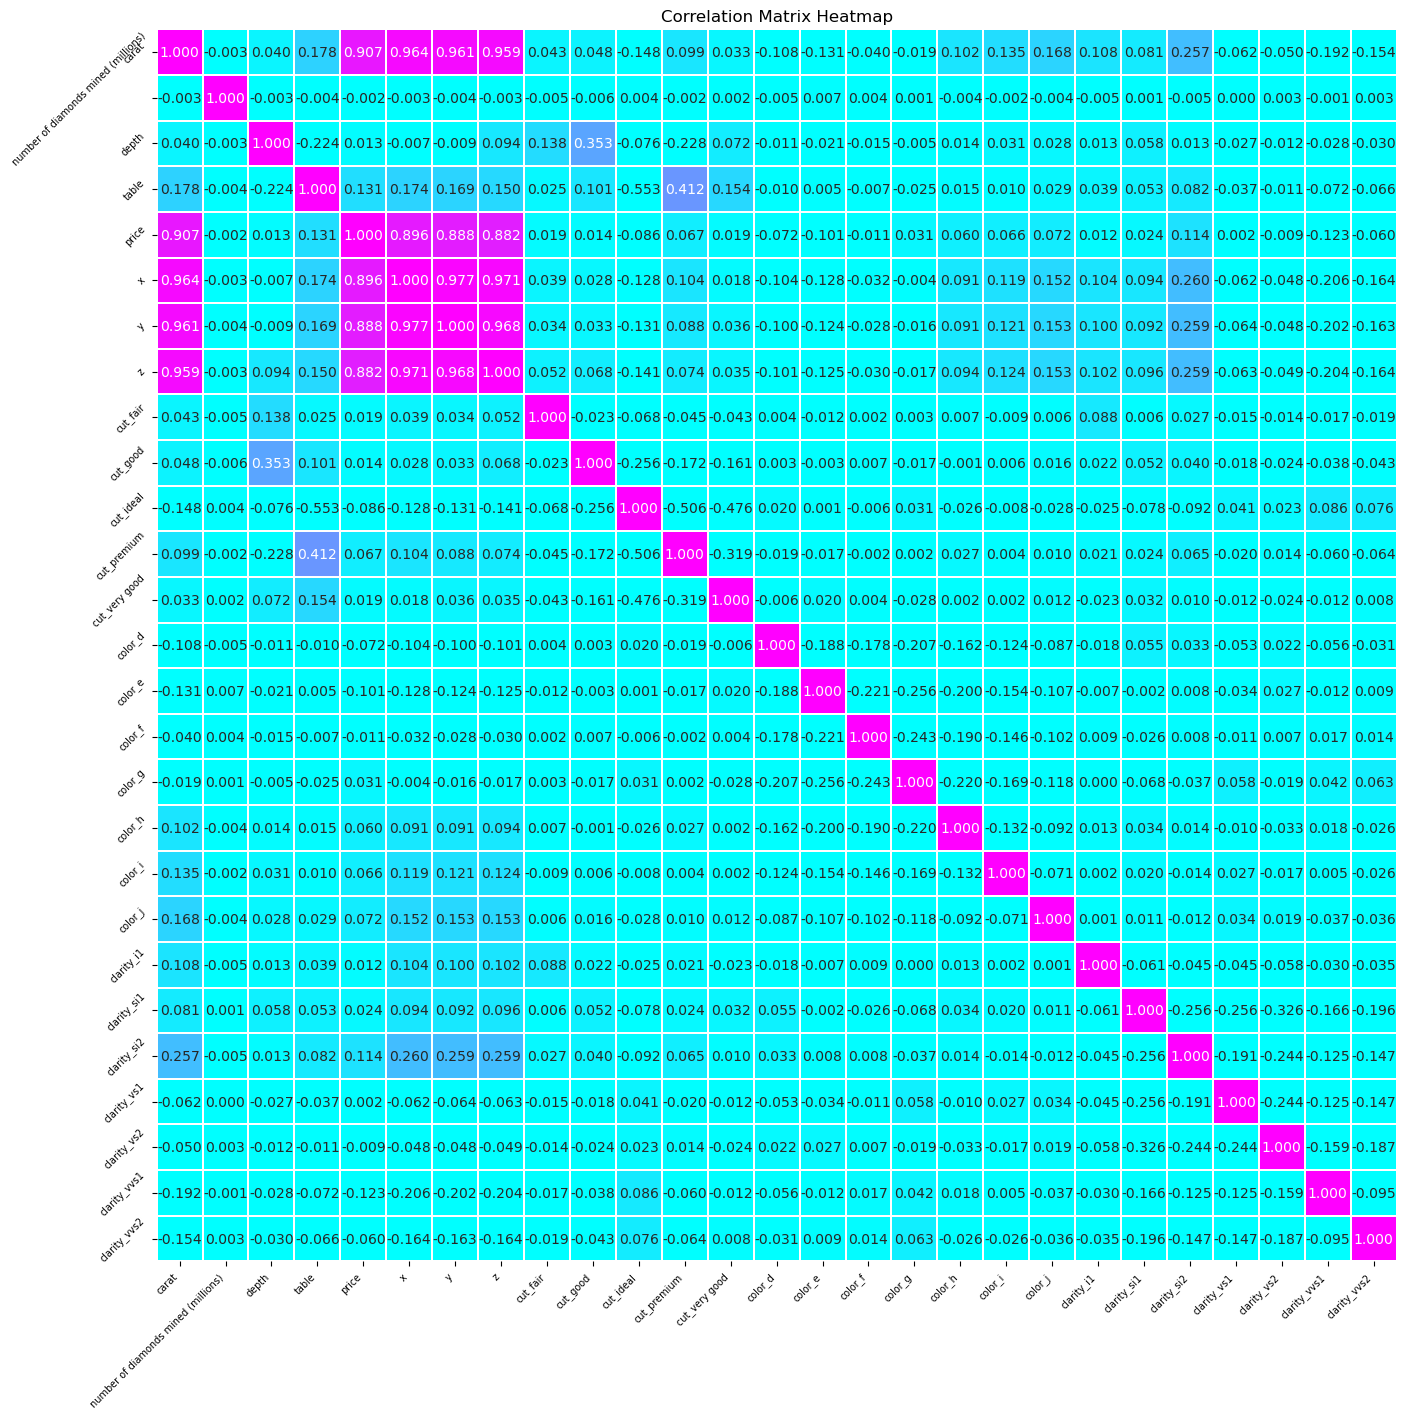

In [505]:
correlation_matrix = df.corr()


plt.figure(figsize=(16, 16))

sns.heatmap(correlation_matrix, annot=True, cmap='cool', vmin=0, vmax=1, linewidths=0.1, fmt='.3f' , cbar=False)    
plt.xticks(rotation=45, ha='right',fontsize=7) 
plt.yticks(rotation=45, ha='right',fontsize=7)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [506]:
# removed un-related columns
df = df.drop(columns=['number of diamonds mined (millions)','cut_very good','color_g','depth','cut_fair','clarity_vs2','clarity_vs1','cut_good','clarity_si1','color_f'],axis=1)

In [507]:
df.to_csv('diamond_preprocessed.csv', index=False)